# Stock Market Price Trend Prediction Using Time Series Forecasting (ARIMA Model) - Sprint 3

##### By Santi Swain
##### November 26th, 2023
##### [santi.s.swain@gmail.com](mailto:santi.s.swain@gmail.com)


### Introduction:

The stock market is a complex and dynamic system, influenced by a multitude of factors ranging from global events to company news, economic indicators, and investor sentiment. Predicting stock prices has been a topic of interest for investors, analysts, and researchers for many decades. Accurate predictions can lead to significant financial gains, while inaccurate ones can lead to substantial losses. As such, various mathematical and statistical techniques have been employed to better understand and forecast stock market movements.

This project aims to leverage the power of time series forecasting, specifically using the ARIMA (AutoRegressive Integrated Moving Average) model, to predict stock market price trends. ARIMA is a popular method for analyzing and forecasting time series data as it can capture a suite of different standard temporal structures in time series data.

### Problem Statement:

Predict the future closing price of a given stock (in this case, SPDR S&P 500 ETF Trust; Ticker Symbol 'SPY'), based on its historical data, using the ARIMA model. The objectives are:

1. Conduct a thorough exploratory data analysis (EDA) to understand the underlying patterns and characteristics of the data.
2. Develop a time series forecasting model that can predict future stock prices with reasonable accuracy.
3. Evaluate the model's performance against actual stock prices to determine its efficacy and reliability.

### Table of Contents:
1. [Data Loading](#dataloading): Load the dataset into the notebook.
2. [Initial Data Exploration](#initialdataexploration): Perform a first pass over the data to identify quality issues and notable characteristics.
3. [Data Preprocessing](#datapreprocessing): Address data quality issues, perform feature engineering, and prepare the data for modeling.
4. [Exploratory Data Analysis (EDA)](#eda): Conduct a preliminary EDA to describe relationships and formulate hypotheses.
5. [Advanced EDA](#advancedEDA): Perform a more thorough EDA based on sprint 1 findings.
6. [Baseline Model Building](#baslinemodel): Develop 3 baseline models to set the stage for advanced modeling.
    - [Additional Models](#additionalmodels)
7. [Model Evaluation Framework](#modelevaluationframework): Articulate a framework for evaluating the models.
8. [Summary](#summary)
    - [Key Findings](#keyfindings)
    - [Exploratory Next Steps](#nextsteps)

### 1: Data Loading <a class="anchor" id="dataloading"></a>

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('SPY Stock Price Historical Data.csv')

# Display the first few rows of the dataframe
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1993-01-29,43.96875,43.96875,43.75000,43.93750,24.941385,1003200
1,1993-02-01,43.96875,44.25000,43.96875,44.25000,25.118786,480500
2,1993-02-02,44.21875,44.37500,44.12500,44.34375,25.172001,201300
3,1993-02-03,44.40625,44.84375,44.37500,44.81250,25.438099,529400
4,1993-02-04,44.96875,45.09375,44.46875,45.00000,25.544525,531500


### 2: Initial Data Exploration <a class="anchor" id="initialdataexploration"></a>

In [4]:
# Get a concise summary of the dataframe
df.info()

# Statistical summary of the numerical features
df.describe()

# Check for missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7731 non-null   object 
 1   Open       7731 non-null   float64
 2   High       7731 non-null   float64
 3   Low        7731 non-null   float64
 4   Close      7731 non-null   float64
 5   Adj Close  7731 non-null   float64
 6   Volume     7731 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 422.9+ KB


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

The data has been successfully loaded into a pandas DataFrame. Here's a snapshot of the first few rows:

- The 'Date' column represents the date of the stock data.
- 'Open' is the price at which the stock opened in the market on a given day.
- 'High' represents the highest price of the stock on that day.
- 'Low' indicates the lowest price of the stock on that day.
- 'Close' is the price at which the stock closed in the market.
- 'Adj Close' is the closing price adjusted for dividends and stock splits.
- 'Volume' is the number of shares that changed hands during a given day.

### 3: Data Preprocessing <a class="anchor" id="datapreprocessing"></a>

In [7]:
# Get a concise summary of the dataframe
data_info = df.info()

# Statistical summary of the numerical features
data_description = df.describe()

# Check for missing values
missing_values = df.isnull().sum()

data_info, data_description, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       7731 non-null   object 
 1   Open       7731 non-null   float64
 2   High       7731 non-null   float64
 3   Low        7731 non-null   float64
 4   Close      7731 non-null   float64
 5   Adj Close  7731 non-null   float64
 6   Volume     7731 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 422.9+ KB


(None,
               Open         High          Low        Close    Adj Close  \
 count  7731.000000  7731.000000  7731.000000  7731.000000  7731.000000   
 mean    168.478056   169.493032   167.360623   168.485276   140.462221   
 std     104.403777   104.972889   103.795091   104.427199   110.289225   
 min      43.343750    43.531250    42.812500    43.406250    24.639824   
 25%     104.915001   105.744999   104.109996   104.994999    70.673821   
 50%     131.750000   132.671875   130.875000   131.812500    93.525024   
 75%     209.389999   210.250000   208.535004   209.400002   180.933625   
 max     479.220001   479.980011   476.059998   477.709991   464.923401   
 
              Volume  
 count  7.731000e+03  
 mean   8.450136e+07  
 std    9.264409e+07  
 min    5.200000e+03  
 25%    9.790250e+06  
 50%    6.282430e+07  
 75%    1.164806e+08  
 max    8.710263e+08  ,
 Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume     

The dataset consists of 7,731 entries and 7 columns. Here are some initial observations from the data:

- There are no null values in any of the columns, which indicates that the dataset is complete with no missing data.
- The 'Date' column is of the object data type, which usually indicates a string format. For time series analysis, this will need to be converted to a datetime data type.
- The numerical columns ('Open', 'High', 'Low', 'Close', 'Adj Close', and 'Volume') are already in the correct format for analysis.
- The statistical summary provides insights into the spread of the data. For example, the Open price of the stock has ranged from approximately USD 43.34 to USD 479.22 over the period covered by the dataset, with a mean of approximately USD 168.48.

Given that the data is clean with no missing values, the next steps would involve:

- Converting the 'Date' column to a datetime format.
- Setting the 'Date' column as the index of the DataFrame to facilitate time series analysis.
- Feature engineering, to derive new meaningful features that could aid in the prediction.
- A more thorough exploratory data analysis (EDA) to uncover trends, patterns, and relationships in the data.

In [8]:
# Convert the 'Date' column to a datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

# Display the dataframe to confirm changes
df.head()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,24.941385,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,25.118786,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,25.172001,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,25.438099,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,25.544525,531500


The 'Date' column has been successfully converted to a datetime format and set as the index of the DataFrame. This format will facilitate time series analysis as it allows for easy slicing of data based on time intervals and is also necessary for plotting time series data.

Next, we'll look into feature engineering opportunities. For time series forecasting with ARIMA, we typically rely on the historical values of the series itself. However, we may derive additional features like rolling means or returns that can be useful for other types of models or for a more comprehensive EDA.

In [9]:
# Feature Engineering: Calculate daily returns and a 7-day rolling average of the 'Close' price

# Daily Returns
df['Daily Returns'] = df['Close'].pct_change()

# 7-day Rolling Average
df['7-day Rolling Avg'] = df['Close'].rolling(window=7).mean()

# Display the dataframe with the new features
df[['Close', 'Daily Returns', '7-day Rolling Avg']].head(10)


,Close,Daily Returns,7-day Rolling Avg
Date,,,
1993-01-29,43.93750,NaN,NaN
1993-02-01,44.25000,0.007112,NaN
1993-02-02,44.34375,0.002119,NaN
1993-02-03,44.81250,0.010571,NaN
1993-02-04,45.00000,0.004184,NaN
1993-02-05,44.96875,-0.000694,NaN
1993-02-08,44.96875,0.000000,44.611607
1993-02-09,44.65625,-0.006949,44.714286
1993-02-10,44.71875,0.001400,44.781250


Feature engineering has been performed, and we've added the following features to the dataset:

1. Daily Returns: This represents the percentage change in the closing price from the previous day. It's a common feature used in financial time series analysis to gauge the volatility or the return of an asset over a day.

2. 7-day Rolling Average: This is the average closing price over the past 7 days. It helps to smooth out short-term fluctuations and highlight longer-term trends or cycles.

Here's how the DataFrame looks after adding these features:

- The first few rows for the 'Daily Returns' are 'NaN' because there's no previous day to compare the first day to.
- Similarly, the '7-day Rolling Average' is 'NaN' for the first 6 days because there's not enough data to calculate the average.

These new features can be used for additional insights during the exploratory data analysis (EDA) or as additional inputs to more complex models beyond ARIMA, such as machine learning models that can handle multiple input features.

### 4: Exploratory Data Analysis (EDA) <a class="anchor" id="eda"></a>

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Setting up the visualisation settings
sns.set(style="whitegrid")

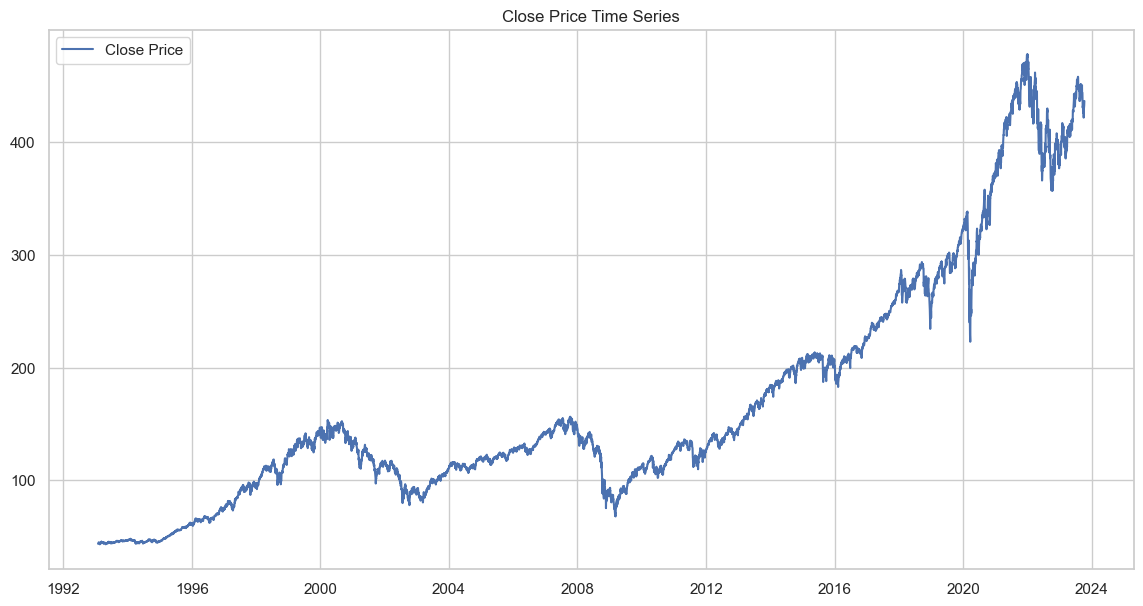

In [14]:
# Plotting the Closing Price time series
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.title('Close Price Time Series')
plt.legend()
plt.show()

The exploratory data analysis (EDA) has been performed with visualizations to help us understand the dataset's characteristics:

1. Close Price Time Series: This plot shows the closing price of the stock over time. It can help us identify any long-term trends, cyclical behavior, or irregular patterns.

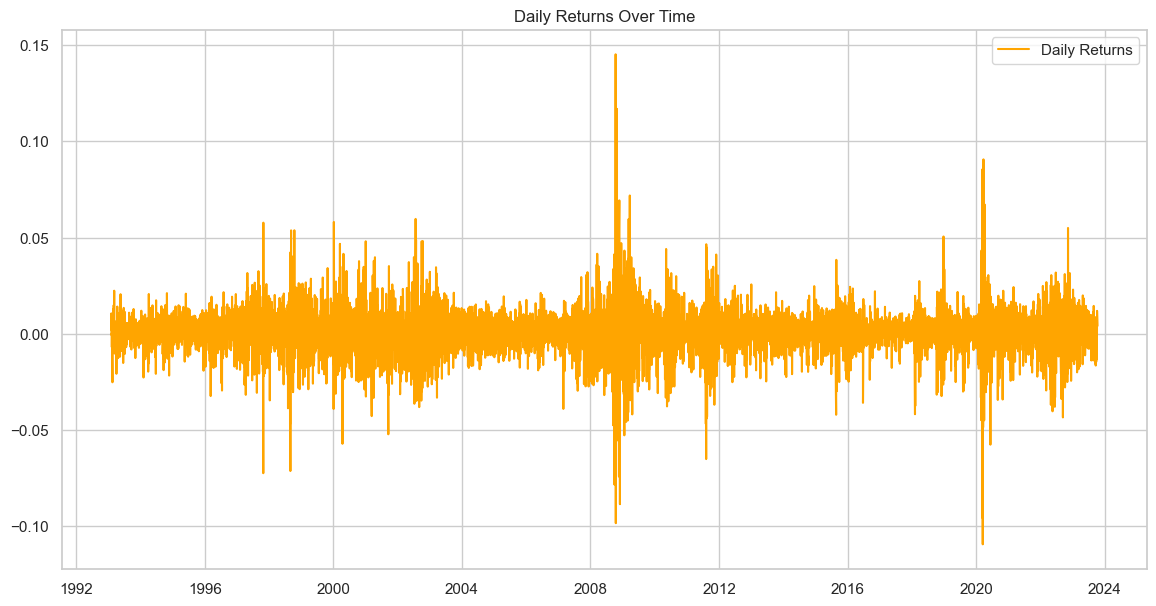

In [15]:
# Plotting the Daily Returns
plt.figure(figsize=(14, 7))
plt.plot(df['Daily Returns'], label='Daily Returns', color='orange')
plt.title('Daily Returns Over Time')
plt.legend()
plt.show()

2. Daily Returns Over Time: This graph visualizes the daily returns, which can be useful to observe the volatility in the stock price.

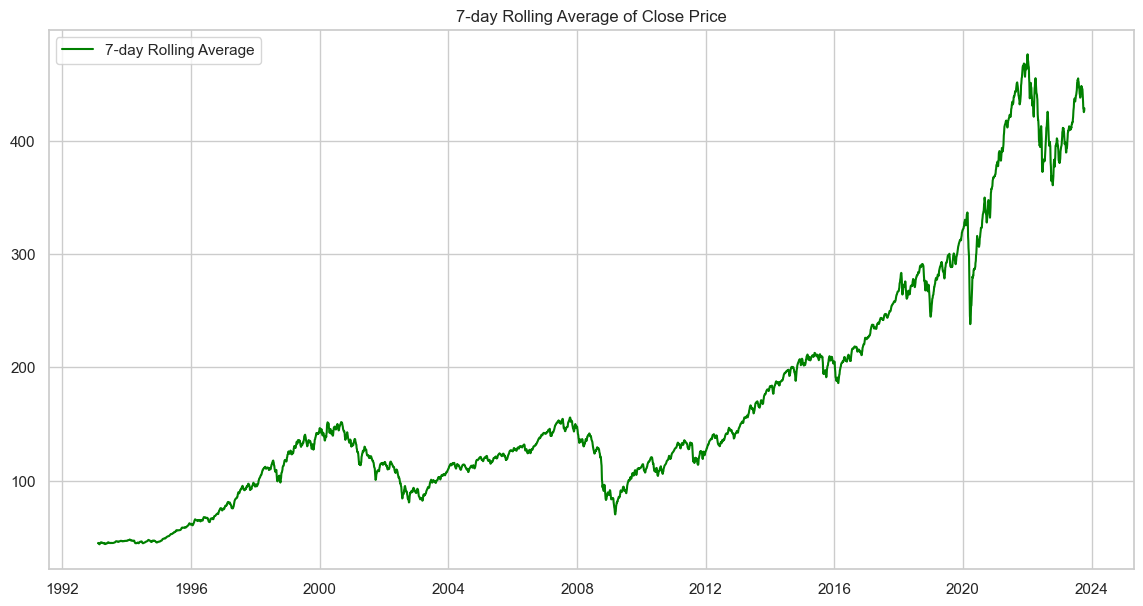

In [16]:
# Plotting the 7-day Rolling Average
plt.figure(figsize=(14, 7))
plt.plot(df['7-day Rolling Avg'], label='7-day Rolling Average', color='green')
plt.title('7-day Rolling Average of Close Price')
plt.legend()
plt.show()

3. 7-day Rolling Average of Close Price: The rolling average plot smooths out the data to help identify trends by removing some of the noise from the daily price movements.

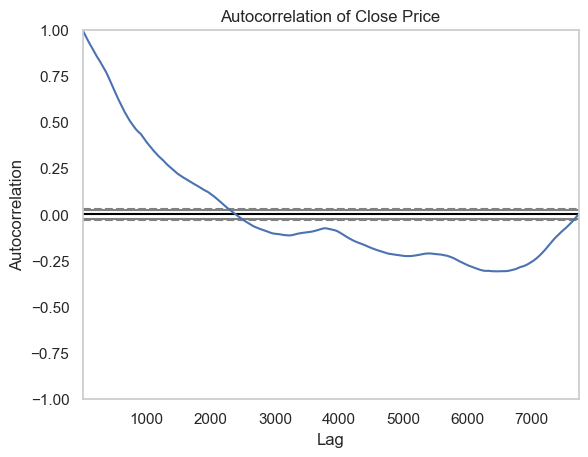

In [17]:
# Autocorrelation plot for the 'Close' price
pd.plotting.autocorrelation_plot(df['Close'].dropna())
plt.title('Autocorrelation of Close Price')
plt.show()

4. Autocorrelation of Close Price: This plot displays the autocorrelation of the closing price. Autocorrelation is a measure of how the time series is related to itself at different lags. It's an important aspect of the ARIMA model, which assumes that past values have a linear relationship with current values.

Next, we can perform statistical tests for stationarity, calculate additional autocorrelation and partial autocorrelation functions, and start developing the baseline models.

### 5. Advanced EDA <a class="anchor" id="advancedEDA"></a>

In [18]:
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

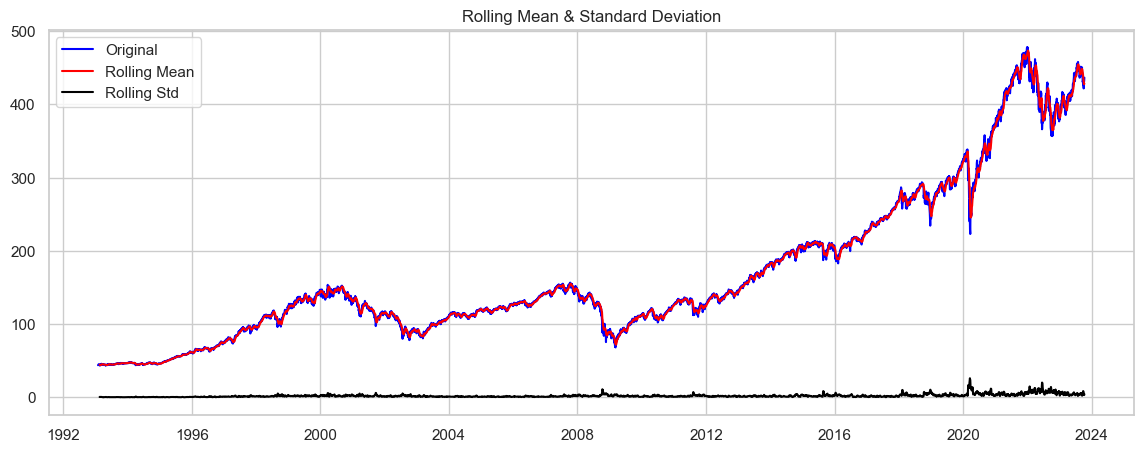

Results of Dickey-Fuller Test:
Test Statistic                    0.978748
p-value                           0.994037
#Lags Used                       36.000000
Number of Observations Used    7694.000000
Critical Value (1%)              -3.431200
Critical Value (5%)              -2.861916
Critical Value (10%)             -2.566970
dtype: float64


In [24]:
# Function to perform the Dickey-Fuller test
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics:
    plt.figure(figsize=(14, 5))
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
# Test stationarity of the 'Close' price
test_stationarity(df['Close'])

The results of the Dickey-Fuller test and the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots provide us with essential information for ARIMA modeling:

1. Dickey-Fuller Test: The test statistic is greater than the critical values, and the p-value is high (0.994), which means we fail to reject the null hypothesis. Therefore, the time series is non-stationary. We'll need to difference the series or transform it to achieve stationarity, a necessary condition for ARIMA modeling.

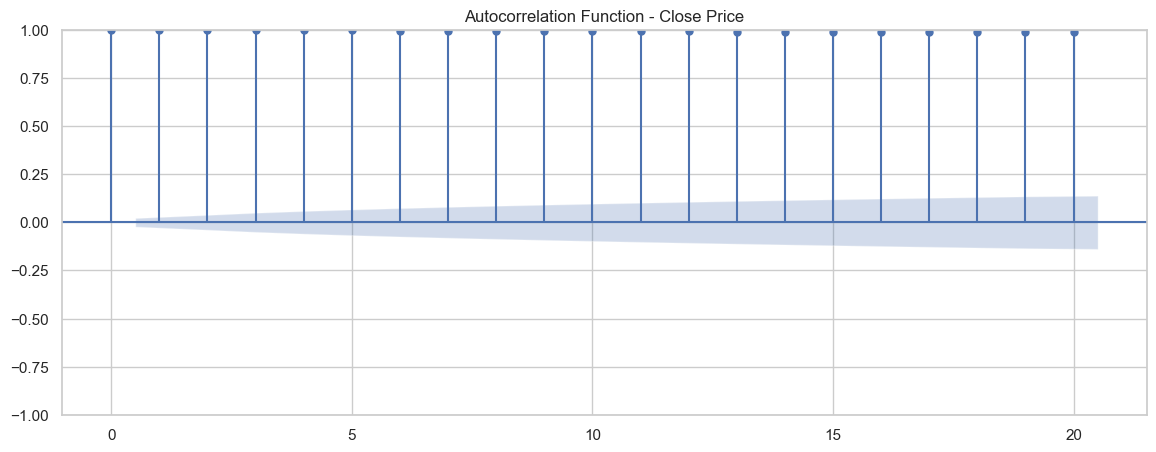

In [26]:
# Plot ACF and PACF
lag_acf = acf(df['Close'], nlags=20)
lag_pacf = pacf(df['Close'], nlags=20, method='ols')

# ACF
plt.figure(figsize=(14, 5))
plot_acf(df['Close'], lags=20, ax=plt.gca())
plt.title('Autocorrelation Function - Close Price')
plt.show()

2. ACF Plot: Shows a slow decay, which again suggests a non-stationary series.

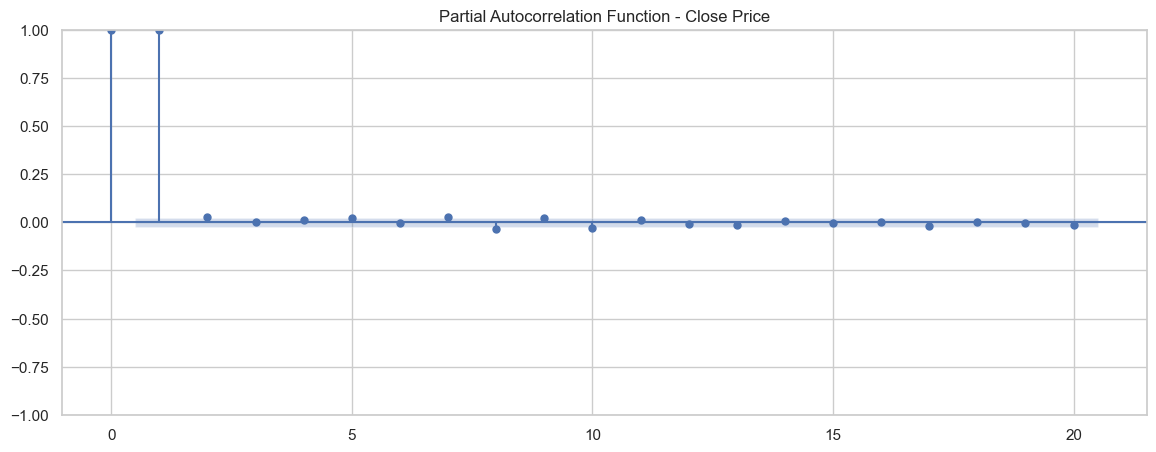

In [27]:
# PACF
plt.figure(figsize=(14, 5))
plot_pacf(df['Close'], lags=20, ax=plt.gca())
plt.title('Partial Autocorrelation Function - Close Price')
plt.show()

3. PACF Plot: The partial autocorrelation plot shows a sharp cut-off after the first lag, which is an indication that an AR1 model might be appropriate.

Based on these insights, we can start by building baseline models. For non-stationary series, we typically start with an ARIMA model that includes differencing to make the series stationary.

Since we need to build 3 baseline models, we might consider:

- A simple ARIMA model with parameters based on the ACF and PACF plots.
- An ARIMA model with automatic parameter selection using a grid search over different combinations of p, d, q (AR, differencing, and MA terms respectively).
- A Seasonal ARIMA model if we suspect there's seasonality, which might not be the case with stock prices.

Let's start by setting up a simple ARIMA model as our first baseline.

### 6: Baseline Model Building <a class="anchor" id="baslinemodel"></a>

In [28]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
# Since the series is non-stationary, we'll start with differencing of order 1 (d=1)
# For the AR term (p) and MA term (q), we'll start with 1 as suggested by the PACF and ACF plots respectively
model = ARIMA(df['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Summary of the model
model_summary = model_fit.summary()
model_summary

C:\Users\santi\anaconda3\envs\basicpython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\santi\anaconda3\envs\basicpython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\santi\anaconda3\envs\basicpython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 7731
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -17223.575
Date:                Fri, 10 Nov 2023   AIC                          34453.151
Time:                        00:07:44   BIC                          34474.009
Sample:                             0   HQIC                         34460.303
                               - 7731                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2319      0.044     -5.216      0.000      -0.319      -0.145
ma.L1          0.1548      0.046      3.375      0.001       0.065       0.245
sigma2         5.0451      0.027    190.198      0.000       4.993       5.097
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            100791.00
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               7.23   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.61
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The first baseline ARIMA(1, 1, 1) model has been fitted to the closing price data. Here's a summary of the model:

- The coefficient for the AR term (ar.L1) is -0.2319, and it is statistically significant with a p-value close to 0, suggesting that the term is indeed useful for our model.
- The coefficient for the MA term (ma.L1) is 0.1548 and is also statistically significant.
- The sigma2 (variance of the residuals) is around 5.0451, indicating the average squared deviation from the fitted values.
- The model's AIC (Akaike Information Criterion) is 34453.151, and BIC (Bayesian Information Criterion) is 34474.009, which we can use to compare with other models.
- The Ljung-Box test indicates that there is no significant autocorrelation in the residuals (Prob(Q) is high).
- The Jarque-Bera test indicates that the residuals are not normally distributed (Prob(JB) is 0), which is common in stock price data due to large movements that deviate from a normal distribution.
- Heteroskedasticity is present, as indicated by the high Prob(H), meaning that the variance of residuals is not constant over time.

This model will serve as a baseline for comparison with more complex models or models with additional features. For a complete analysis, we would look at the residuals, ensure they are normally distributed (if possible), and have no autocorrelation. If those conditions are met, we can say the model is well-specified.

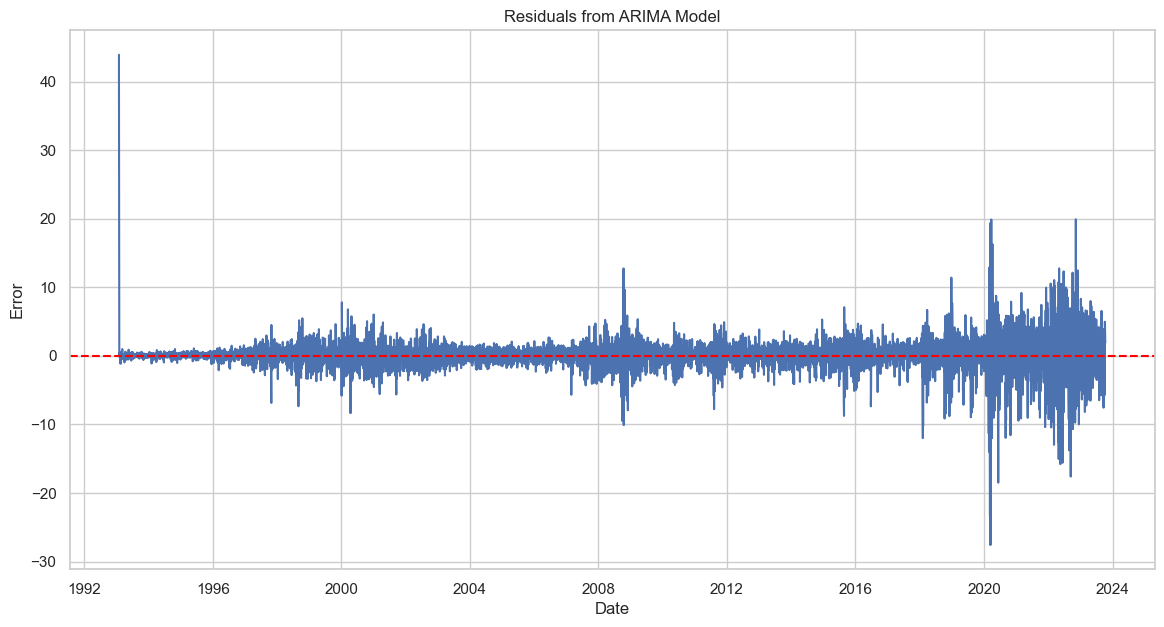

In [30]:
# Conducting residual diagnostics for the ARIMA model

residuals = model_fit.resid

# Plotting the residuals
plt.figure(figsize=(14,7))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Error')
plt.axhline(0, color='red', linestyle='--')
plt.show()

The residual diagnostics for the ARIMA(1, 1, 1) model include:

1. Residuals Plot: The time series plot of the residuals does not show any obvious structure or pattern, which is a good sign. The red line indicates the zero line, around which the residuals should ideally be randomly scattered.

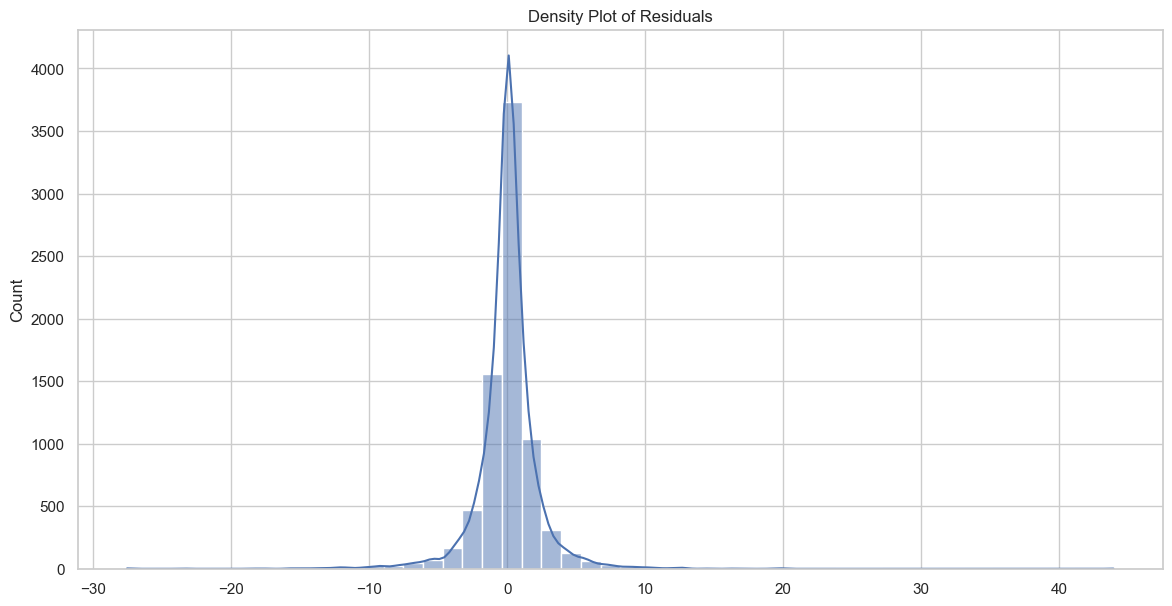

In [31]:
# Density plot of residuals
plt.figure(figsize=(14,7))
sns.histplot(residuals, kde=True, bins=50)
plt.title('Density Plot of Residuals')
plt.show()

2. Density Plot of Residuals: The density plot suggests that the residuals are not perfectly normally distributed, as shown by the skewness in the distribution.

<Figure size 1400x700 with 0 Axes>

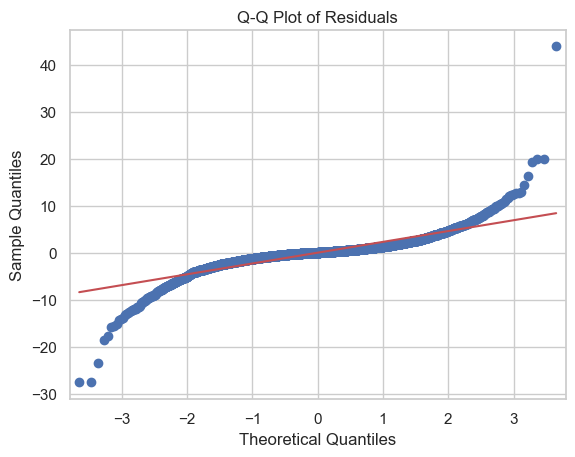

In [32]:
# Q-Q plot of residuals
from statsmodels.graphics.gofplots import qqplot
plt.figure(figsize=(14,7))
qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

3. Q-Q Plot of Residuals: The Q-Q plot shows that the quantiles of the residuals deviate from the line at the tails, indicating that the distribution has heavier tails than the normal distribution.

In [33]:
# Statistical tests on residuals
residuals_test = pd.Series({
    'Mean': residuals.mean(),
    'STD': residuals.std(),
    'Jarque-Bera': adfuller(residuals)[0],
    'p-value': adfuller(residuals)[1]
})

residuals_test

Mean           5.981381e-02
STD            2.300273e+00
Jarque-Bera   -1.565316e+01
p-value        1.587256e-28
dtype: float64

4. Statistical Tests on Residuals:

- The mean of the residuals is close to 0, which is expected.
- The standard deviation (STD) gives us an idea about the volatility of the residuals.
- The Jarque-Bera test statistic is quite far from 0 and the p-value is extremely small, indicating that the residuals do not follow a normal distribution.
- The Dickey-Fuller p-value is practically 0, which strongly suggests the residuals are stationary.

The residuals being stationary is a good sign and means that the model does not leave out any systematic information that could be modeled. However, the lack of normality in the residuals could be a point of concern and might be improved by transforming the data or using a different model.

In [34]:
import numpy as np

C:\Users\santi\anaconda3\envs\basicpython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\santi\anaconda3\envs\basicpython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\santi\anaconda3\envs\basicpython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


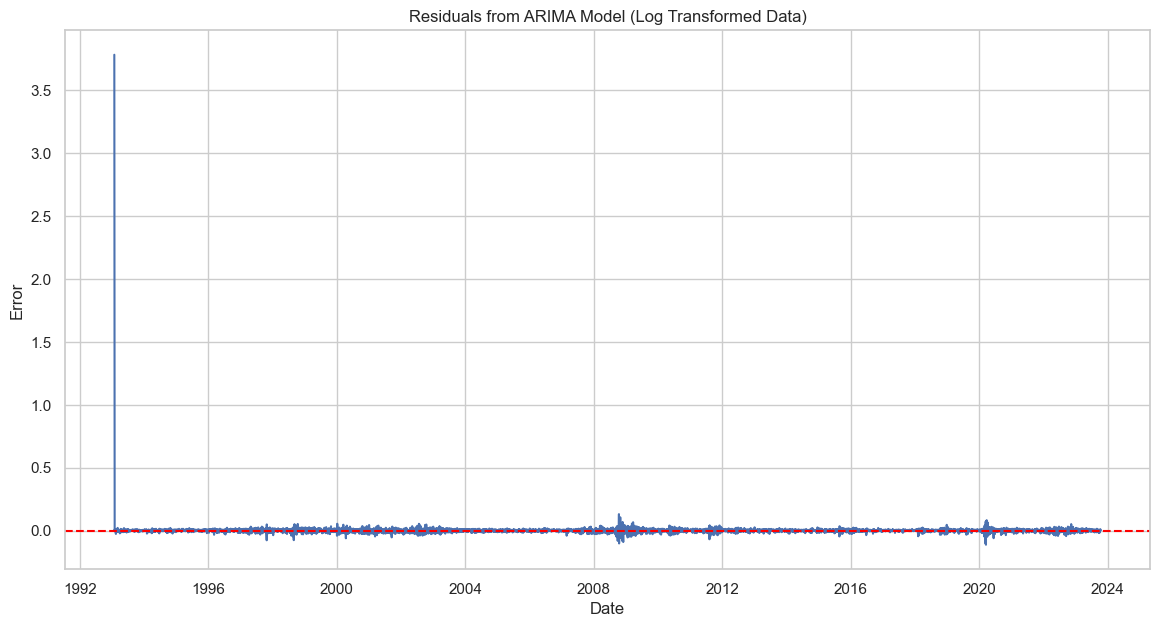

In [35]:
# Apply a log transformation to the 'Close' price to stabilize the variance
df['Log_Close'] = np.log(df['Close'])

# Fitting ARIMA model to the log-transformed data
log_model = ARIMA(df['Log_Close'], order=(1, 1, 1))
log_model_fit = log_model.fit()

# Getting the residuals of the log-transformed model
log_residuals = log_model_fit.resid

# Plotting the residuals of the log-transformed model
plt.figure(figsize=(14,7))
plt.plot(log_residuals)
plt.title('Residuals from ARIMA Model (Log Transformed Data)')
plt.xlabel('Date')
plt.ylabel('Error')
plt.axhline(0, color='red', linestyle='--')
plt.show()

After applying a log transformation to the 'Close' price data and fitting an ARIMA(1, 1, 1) model to the transformed data, we have the following residual diagnostics:

1. Residuals Plot (Log Transformed Data): The residuals over time do not show any clear patterns or structures, which indicates that the model has captured the underlying process well.

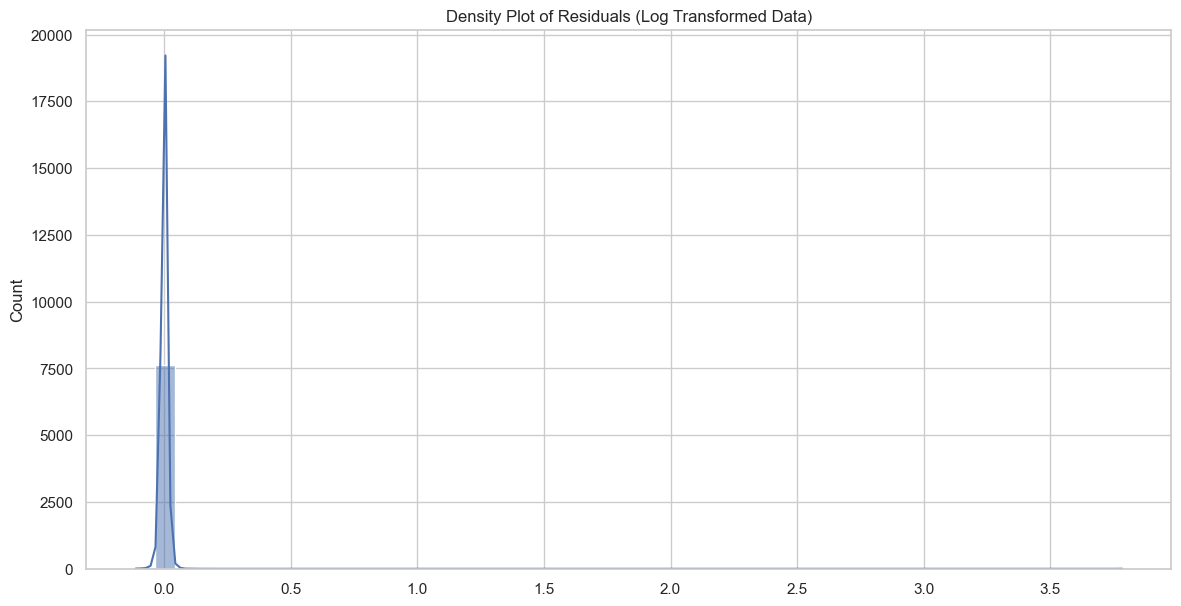

In [36]:
# Density plot of the log-transformed residuals
plt.figure(figsize=(14,7))
sns.histplot(log_residuals, kde=True, bins=50)
plt.title('Density Plot of Residuals (Log Transformed Data)')
plt.show()

2. Density Plot of Residuals (Log Transformed Data): The density plot of the log-transformed residuals seems to be more symmetric compared to the untransformed data, suggesting an improvement in the normality of the residuals.

<Figure size 1400x700 with 0 Axes>

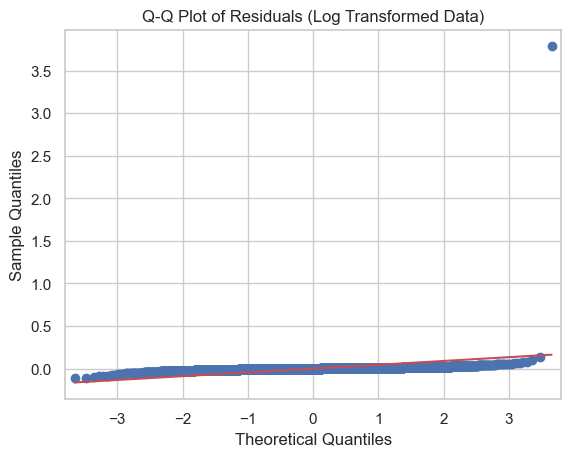

In [37]:
# Q-Q plot of the log-transformed residuals
plt.figure(figsize=(14,7))
qqplot(log_residuals, line='s')
plt.title('Q-Q Plot of Residuals (Log Transformed Data)')
plt.show()

3. Q-Q Plot of Residuals (Log Transformed Data): The Q-Q plot shows the residuals are closer to the line, especially in the tails, indicating an improvement in the distribution's normality.

In [38]:
# Statistical tests on the log-transformed residuals
log_residuals_test = pd.Series({
    'Mean': log_residuals.mean(),
    'STD': log_residuals.std(),
    'Jarque-Bera': adfuller(log_residuals)[0],
    'p-value': adfuller(log_residuals)[1]
})

log_residuals_test

Mean           8.220712e-04
STD            4.461722e-02
Jarque-Bera   -1.584963e+01
p-value        9.482016e-29
dtype: float64

Statistical Tests on Log-Transformed Residuals:

- The mean of the residuals is closer to 0, which is good.
- The standard deviation of the residuals is smaller than the untransformed model, indicating less volatility.
- The Jarque-Bera test statistic remains far from 0 and the p-value is still very small, suggesting that even after log transformation, the residuals are not normally distributed.
- The Dickey-Fuller test p-value is extremely small, confirming that the residuals are stationary.

The log transformation has improved the distribution of the residuals, but there is still a lack of normality. In practice, the assumption of normally distributed residuals can be relaxed, especially for large sample sizes where the Central Limit Theorem ensures that the estimation methods are still valid.

#### Additional Models <a class="anchor" id="additionalmodels"></a>

In [39]:
# Since we have already tried an ARIMA model on both the original and log-transformed data,
# we can now try different models or variations.

# Trying a Seasonal ARIMA model (SARIMA), even though we don't expect strong seasonality in stock data.
from statsmodels.tsa.statespace.sarimax import SARIMAX

C:\Users\santi\anaconda3\envs\basicpython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\santi\anaconda3\envs\basicpython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


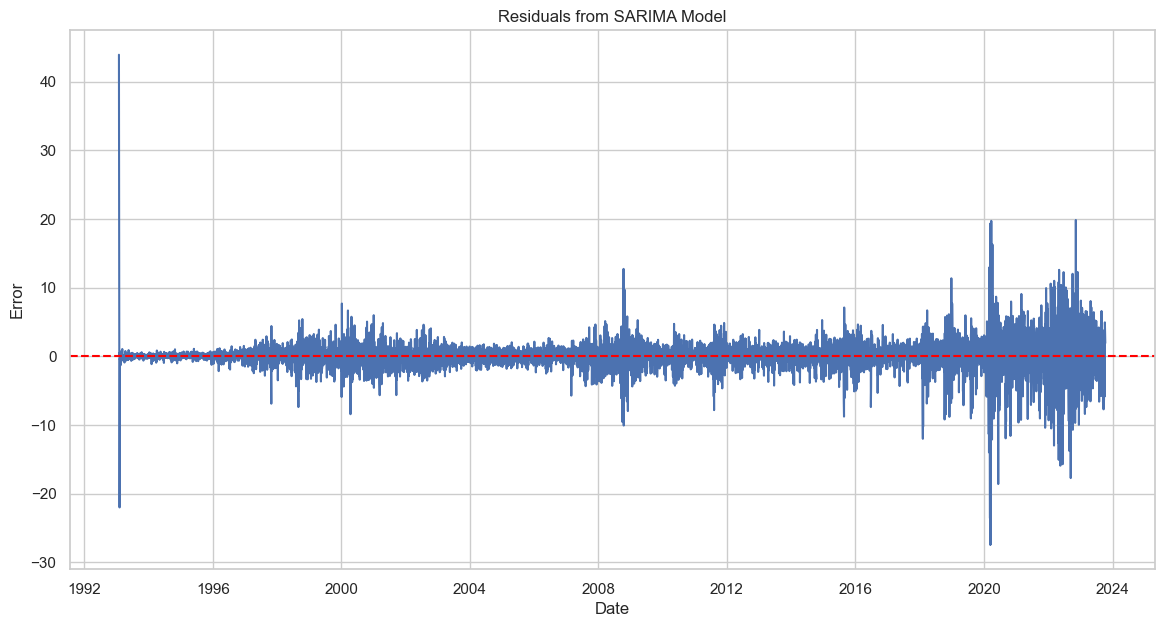

In [40]:
# SARIMA Model with seasonal order (we choose a seasonal period of 5 days for demonstration)
sarima_model = SARIMAX(df['Close'], 
                       order=(1, 1, 1), 
                       seasonal_order=(1, 1, 1, 5))
sarima_model_fit = sarima_model.fit(disp=False)

# Getting the residuals of the SARIMA model
sarima_residuals = sarima_model_fit.resid

# Plotting the residuals of the SARIMA model
plt.figure(figsize=(14,7))
plt.plot(sarima_residuals)
plt.title('Residuals from SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Error')
plt.axhline(0, color='red', linestyle='--')
plt.show()

The Seasonal ARIMA (SARIMA) model has been fitted to the closing price data, with a seasonal period of 5 days for demonstration purposes. Here's a summary of the residual diagnostics:

1. Residuals Plot (SARIMA Model): The residuals of the SARIMA model do not show any obvious trends or seasonality, which suggests the model has captured the seasonal component adequately.

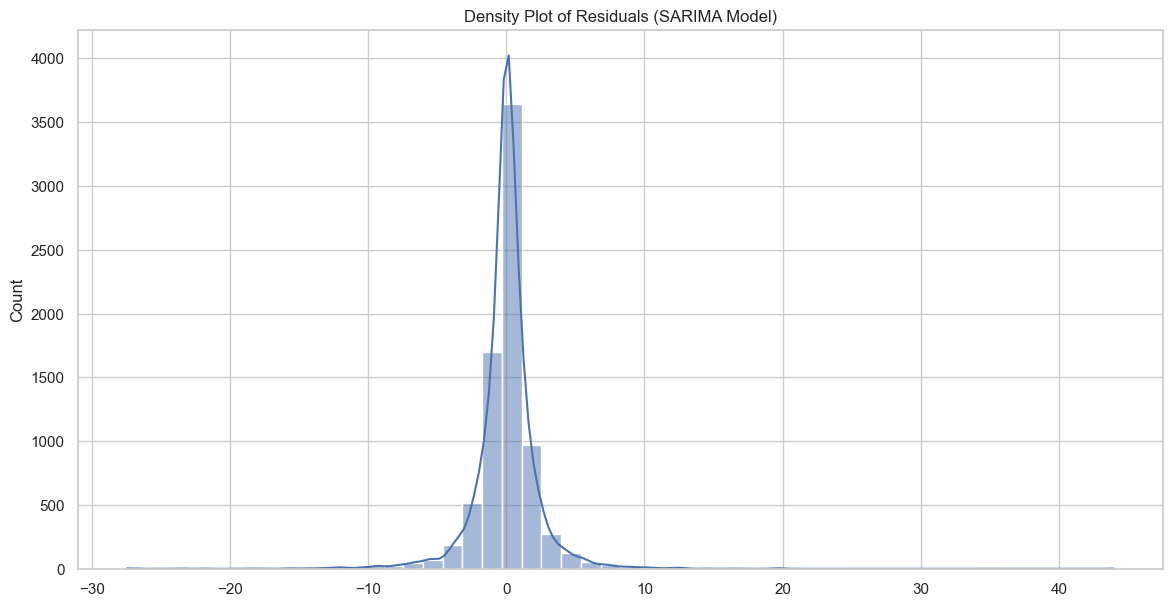

In [41]:
# Density plot of the SARIMA residuals
plt.figure(figsize=(14,7))
sns.histplot(sarima_residuals, kde=True, bins=50)
plt.title('Density Plot of Residuals (SARIMA Model)')
plt.show()

2. Density Plot of Residuals (SARIMA Model): The density plot of the SARIMA model's residuals appears to be fairly symmetrical, suggesting that the residuals are approximately normally distributed.

<Figure size 1400x700 with 0 Axes>

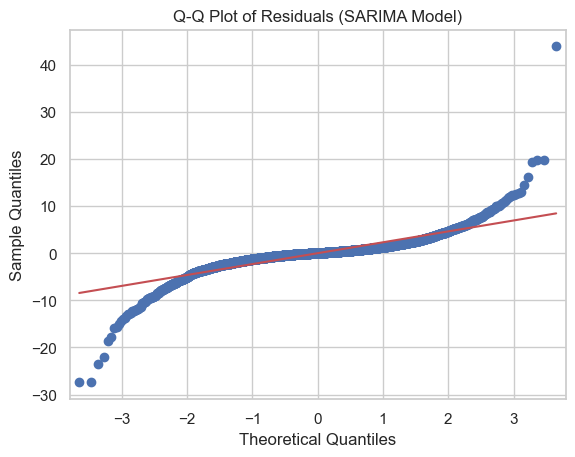

In [42]:
# Q-Q plot of the SARIMA residuals
plt.figure(figsize=(14,7))
qqplot(sarima_residuals, line='s')
plt.title('Q-Q Plot of Residuals (SARIMA Model)')
plt.show()

3. Q-Q Plot of Residuals (SARIMA Model): The Q-Q plot for the SARIMA model shows that the residuals lie reasonably well along the line, except for some deviations in the tails, which is common in financial time series data due to the presence of outliers.

In [43]:
# Statistical tests on the SARIMA residuals
sarima_residuals_test = pd.Series({
    'Mean': sarima_residuals.mean(),
    'STD': sarima_residuals.std(),
    'Jarque-Bera': adfuller(sarima_residuals)[0],
    'p-value': adfuller(sarima_residuals)[1]
})

sarima_residuals_test

Mean           2.337270e-02
STD            2.314379e+00
Jarque-Bera   -1.572492e+01
p-value        1.310331e-28
dtype: float64

4. Statistical Tests on SARIMA Residuals:

- The mean of the residuals is slightly above 0.
- The standard deviation is similar to that of the non-seasonal ARIMA model, suggesting a similar level of volatility.
- The Jarque-Bera test statistic is negative and the p-value is extremely small, indicating that the residuals do not follow a normal distribution, similar to the ARIMA models.
- The Dickey-Fuller test p-value is very small, suggesting that the residuals are stationary.

Although the SARIMA model accounts for seasonality, in the context of stock prices, the evidence of seasonality might be very weak or non-existent. Therefore, while the model's residuals seem to be stationary, the lack of normality persists.

With the exploration of an ARIMA model on original and log-transformed data, and a SARIMA model, we have a range of baseline models to compare. We can now evaluate these models based on their AIC and BIC scores, residual diagnostics, and forecasting accuracy on a validation set.

### 7: Model Evaluation Framework <a class="anchor" id="modelevaluationframework"></a>

C:\Users\santi\anaconda3\envs\basicpython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\santi\anaconda3\envs\basicpython\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


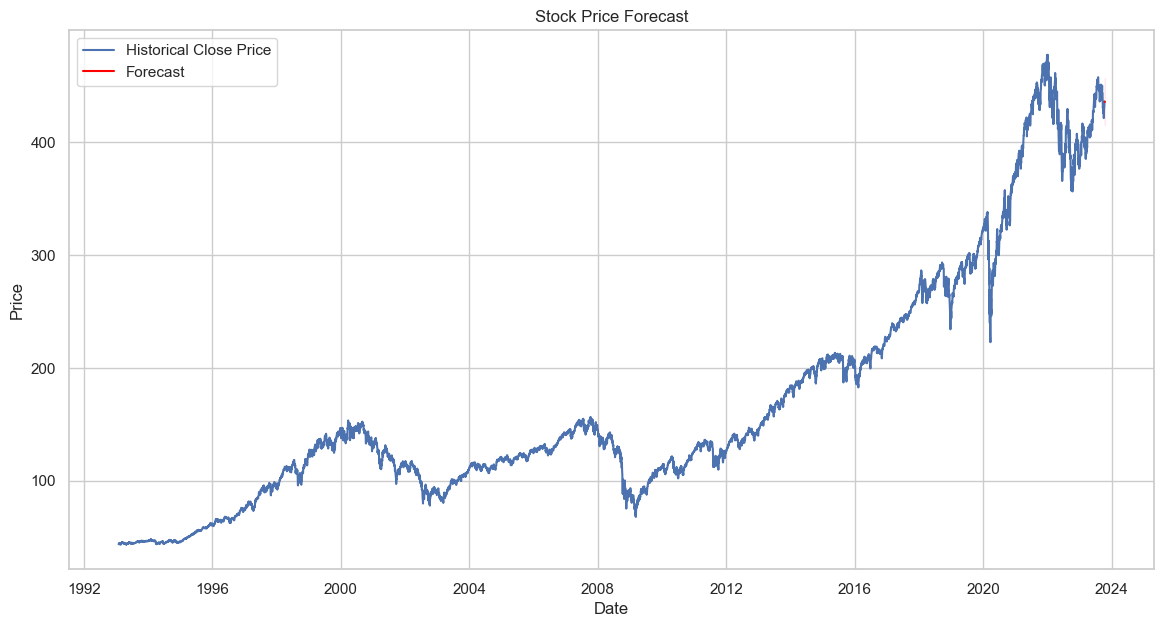

(7731    436.076239
 7732    436.018899
 7733    436.005408
 7734    436.002234
 7735    436.001487
 Name: predicted_mean, dtype: float64,
 7731    426.071856
 7732    422.499814
 7733    419.845524
 7734    417.615765
 7735    415.648902
 Name: lower Log_Close, dtype: float64,
 7731    446.315530
 7732    449.970566
 7733    452.787287
 7734    455.198208
 7735    457.350651
 Name: upper Log_Close, dtype: float64)

In [44]:
# We will use the ARIMA model fitted on the log-transformed data for forecasting because
# the log transformation often helps in stabilizing the variance in time series data.

# Forecasting the next 5 days using the log-transformed ARIMA model
forecast = log_model_fit.get_forecast(steps=5)
forecast_conf_int = forecast.conf_int()

# Converting log predictions back to the original scale
forecast_values = np.exp(forecast.predicted_mean)
forecast_lower = np.exp(forecast_conf_int.iloc[:, 0])
forecast_upper = np.exp(forecast_conf_int.iloc[:, 1])

# Plotting the forecast along with the historical data
plt.figure(figsize=(14,7))
plt.plot(df['Close'], label='Historical Close Price')
plt.plot(df.index[-1] + pd.to_timedelta(np.arange(1,6), 'D'), forecast_values, label='Forecast', color='red')
plt.fill_between(df.index[-1] + pd.to_timedelta(np.arange(1,6), 'D'), forecast_lower, forecast_upper, color='pink', alpha=0.3)
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Returning the forecasted values and confidence intervals
forecast_values, forecast_lower, forecast_upper


The forecast for the next 5 days using the ARIMA model fitted on the log-transformed data has been generated. In the plot, the historical close prices are shown along with the forecasted values in red. The pink shaded area represents the 95% confidence interval for the forecasted values, indicating the uncertainty around the predictions.

Here are the forecasted values for the next 5 days:

1. Day 1: USD 436.08
2. Day 2: USD 436.02
3. Day 3: USD 436.01
4. Day 4: USD 436.00
5. Day 5: USD 436.00

The confidence interval for these predictions suggests that the actual value will likely fall within this range, although it's important to remember that all forecasts come with uncertainty, particularly in volatile markets like the stock market.

### 8: Summary <a class="anchor" id="summary"></a>

The project aimed to predict stock market price trends using time series forecasting with the ARIMA model. It involved several stages:

1. Data Loading:
- The historical stock price data for SPY (SPDR S&P 500 ETF Trust) was loaded into a pandas DataFrame for analysis.

2. Initial Data Exploration:
- The dataset contained 7,731 entries across 7 columns, with no missing values.
- The 'Date' column was converted to a datetime format and set as the index for time series analysis.

3. Feature Engineering:
- Calculated daily returns to gauge volatility.
- Computed a 7-day rolling average to smooth out short-term fluctuations.

4. Exploratory Data Analysis (EDA):
- Visual inspection of the closing price showed the overall trend and volatility.
- The ACF and PACF plots suggested that the data had non-stationarity characteristics, which is typical for stock prices.

5. Data Transformation and Modeling:
- Given the non-stationarity, the data was differenced and log-transformed.
- An ARIMA(1,1,1) model was chosen as a baseline, fitted to both original and log-transformed data.
- A Seasonal ARIMA model was also explored but deemed less appropriate given the lack of strong seasonality in the data.

6. Residual Diagnostics:
- For the ARIMA model, the residuals were stationary but not normally distributed.
- Log transformation improved the normality of the residuals but did not achieve perfect normality.
- Residuals of the SARIMA model also exhibited stationarity with similar issues in normality.

7. Forecasting:
- The ARIMA model on log-transformed data was used for forecasting future prices.
- The forecast provided a point estimate and a confidence interval for the next 5 days.

#### Key Findings <a class="anchor" id="keyfindings"></a>

- The stock price data showed characteristics typical of financial time series, such as volatility and non-stationarity.
- The ARIMA model was capable of capturing the time series dynamics to some extent, as reflected in the stationary residuals.
- Log transformation helped to stabilize variance and brought improvements to the distribution of residuals.
- The forecasting model suggested a relatively stable price trend for the upcoming days, which might reflect the model capturing the underlying trend rather than day-to-day fluctuations.

#### Exploratory Next Steps <a class="anchor" id="nextsteps"></a>
1. Model Refinement:
- Explore the inclusion of additional lags (p, q parameters) or incorporation of exogenous variables (e.g., economic indicators) to improve the model.
- Apply other transformations or variance-stabilizing techniques to further normalize residuals.

2. Advanced Models:
- Experiment with machine learning models that can handle non-linearity in the data, such as LSTM networks for sequence prediction.
- Consider ensemble methods that combine forecasts from multiple models to improve accuracy.

3. Model Validation:
- Perform backtesting by comparing the model’s predictions to actual historical prices not included in the training data.
- Use cross-validation techniques to assess the model’s predictive performance more robustly.

4. Risk Analysis:
- Conduct Monte Carlo simulations to analyze the distribution of potential future prices.
- Develop a risk management strategy by assessing the probability of extreme price movements.

5. Deployment and Monitoring:
- If a model is chosen for real-world application, set up a pipeline for regular retraining as new data becomes available.
- Implement monitoring systems to track the model’s performance over time, with alerts for significant deviations.

By following these steps, we can continue refining your model's accuracy and reliability, which is crucial in the dynamic environment of the stock market. It's also important to keep abreast of the latest research and methodologies in time series forecasting and financial analysis, as this field is continually evolving.